# Analyzing Employee Retention and Turnover at NeoTech Corporation


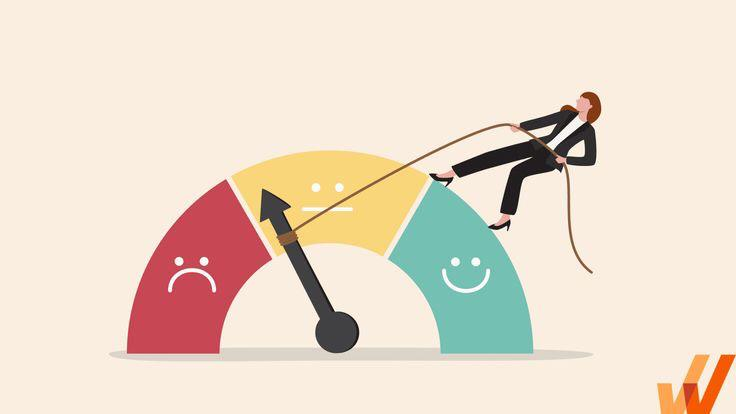

# Introduction
Employee turnover is the rate at which employees leave a company and are replaced by new ones. Employee turnover can have a significant impact on a company's bottom line. It costs money to recruit, train and onboard new employees. High turnover can also lead to disruptions in productivity and morale.
This project analyzes Neo Tech data using Python to understand employee turnover and retention which will help identify the root causes of its high turnover rate and to develop strategies to address these issues. By understanding why employees are leaving the company, NeoTech Corporation can Identify patterns and trends among employees who leave, and also take steps to make the company a more attractive and rewarding place to work.

# Business Problem
Over the past two years, we have noticed a steady increase in employee turnover rate at NeoTech Corporation. This trend has not only resulted in significant recruitment costs but has also led to a loss of skilled talent, and this is costing the company millions of dollars each year. The HR department suspects a number of factors that are contributing to the high turnover rate. One of which is that the company is located in a highly competitive job market. Another factor could be because the environment is very demanding and employees are often required to work long hours and meet tight deadlines. The high turnover rate is having a negative impact on NeoTech Corporation's business. It is costing the company money to recruit and train new employees, and it is also disrupting the company's operations.

# Objective
The objective of this project is to identify the possible factors contributing to high employee turnover and recommend retention strategies based on insights drawn from the data.

# Key Metrics
- **Salary:** The employee salary range comes in three levels ( low, medium, or high).
- **Satisfaction Level:** The measure of employee job  satisfaction expressed in percentage.
-**Last evaluation:** The most recent employee performance evaluation score expressed in percentage.
-**Number of  project:** The total number of projects an employee is involved in.
-**Average monthly hours:** The average  hours an employee works per month.
-**Promotion and Training:** If the employee has been promoted or trained in recent years ( 1=yes, 0=No).
-**Left:** Whether the employee has left the company ( 1=yes, 0=No).


















# **Data Preproccessing**

In [ ]:
# importing python libaries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading data into dataframe
Employee = pd.read_excel(r'C:\Users\BUKOLA ORIRE\Desktop\data\HR Analytics\HR_Employee_Data.xlsx')

In [ ]:
Employee.head()

,Emp_Id,Department,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,Commute_time,Work_accident,left,promotion_last_5years,Training_Last_Year
0,EMP02438,sales,low,0.38,0.53,2,157,3,0,1,0,0
1,EMP28133,sales,medium,0.80,0.86,5,262,6,0,1,0,0
2,EMP07164,sales,medium,0.11,0.88,7,272,4,0,1,0,0
3,EMP30478,sales,low,0.72,0.87,5,223,5,0,1,0,0
4,EMP24003,sales,low,0.37,0.52,2,159,3,0,1,0,0


In [ ]:
# Rename Column for data accuracy
Employee.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)
Employee.columns


Index(['Emp_Id', 'Department', 'salary', 'satisfaction_level',
       'last_evaluation', 'number_project', 'average_monthly_hours',
       'Commute_time', 'Work_accident', 'left', 'promotion_last_5years',
       'Training_Last_Year'],
      dtype='object')

In [ ]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   Department             14999 non-null  object 
 2   salary                 14999 non-null  object 
 3   satisfaction_level     14999 non-null  float64
 4   last_evaluation        14999 non-null  float64
 5   number_project         14999 non-null  int64  
 6   average_monthly_hours  14999 non-null  int64  
 7   Commute_time           14999 non-null  int64  
 8   Work_accident          14999 non-null  int64  
 9   left                   14999 non-null  int64  
 10  promotion_last_5years  14999 non-null  int64  
 11  Training_Last_Year     14999 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1.4+ MB


In [ ]:
# Display sample data to check for accuracy and consistency
Employee.sample(10)

,Emp_Id,Department,salary,satisfaction_level,last_evaluation,number_project,average_monthly_hours,Commute_time,Work_accident,left,promotion_last_5years,Training_Last_Year
1065,EMP02833,RandD,low,0.43,0.52,2,142,3,0,1,0,0
1491,EMP31028,technical,low,0.39,0.56,2,133,3,0,1,0,0
7650,EMP38904,sales,high,0.76,0.77,5,133,2,0,0,0,0
3073,EMP09168,sales,medium,0.57,0.96,4,257,3,0,0,0,0
4356,EMP26347,technical,high,0.92,0.94,5,253,2,0,0,0,0
5399,EMP42416,technical,medium,0.84,0.53,5,190,3,0,0,0,0
10539,EMP24466,marketing,low,0.82,0.77,4,152,2,1,0,0,0
8686,EMP33774,management,medium,0.60,0.60,4,197,3,0,0,0,0
297,EMP24340,product_mng,medium,0.40,0.52,2,147,3,0,1,0,0
3678,EMP23772,sales,low,0.92,0.96,3,154,2,1,0,0,0


In [ ]:
Employee.nunique()

Emp_Id                   14999
Department                  10
salary                       3
satisfaction_level          92
last_evaluation             65
number_project               6
average_monthly_hours      215
Commute_time                 8
Work_accident                2
left                         2
promotion_last_5years        2
Training_Last_Year           2
dtype: int64

In [ ]:
desc_hr=Employee.describe()
# Highlight specific columns in the output
desc_styled=desc_hr.style.map(lambda x:'background-color:green'
                              ,['satisfaction_level','last_evaluation','average_monthly_hours'])
desc_styled


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,Commute_time,Work_accident,left,promotion_last_5years,Training_Last_Year
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.027202
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.162676
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000


- There is high variability in the average hours employees work per month, which indicates that some employees work significantly more than the overall average monthly hours. 75% of employee work higher average monthly hours per month; thus, these employees may experience burnout and stress, which may affect their well-being, productivity and work life balance.
- The average overall satisfaction level of employees is 61%, indicating that some employees are moderately satisfied with their job. However, there are various factors that may influence employee satisfaction and dissatisfaction level. There is low variability in the total satisfaction level among employees, which implies that the satisfaction level is relatively consistent across employees. However, there is need for improvement to enhance overall satisfaction of employees.
- The performance evaluation score percentile (25th, 50th, 75th) provides insights into the distribution, indicating where data tends to cluster. The 25th percentile of employee performance evaluation is 0.56 indicating that 25% of employees have an evaluation percentage score lower than 0.56.
  #



# **Exploratory Data Analysis (Univariante and Bivariante)**

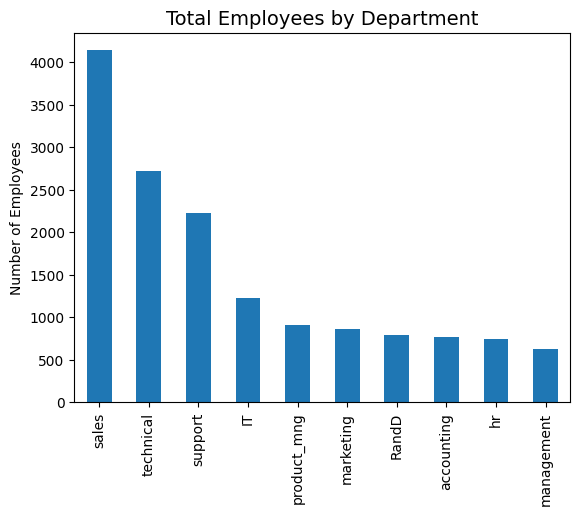

In [ ]:
# What is the distribution of employees across department?
total_employees = Employee['Department'].value_counts().sort_values(ascending=False)
# plot chart
x = total_employees.plot.bar()
x.set_xlabel("")
x.set_ylabel('Number of Employees')
x.set_title('Total Employees by Department',fontsize =14)
plt.show()

##### The top 3 departments with the highest count of employees above 2000 each are sales, technical and support, while the least are accounting, HR, and management with total employees below 1000 respectively.
#

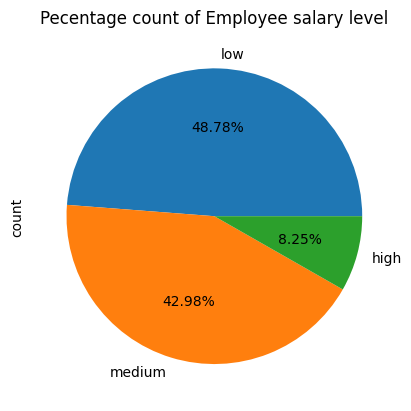

In [ ]:
# The Distribution of Employee by salary category
salary = Employee['salary'].value_counts().sort_values(ascending=False)
salary.plot.pie(title = 'Pecentage count of Employee salary level', autopct = '%1.2f%%')
plt.show()

- At most 49% of employees have low income salary range compared to others.
- Only 8% of employees have high salary level, while about 43% are meduim salary earners.
  #

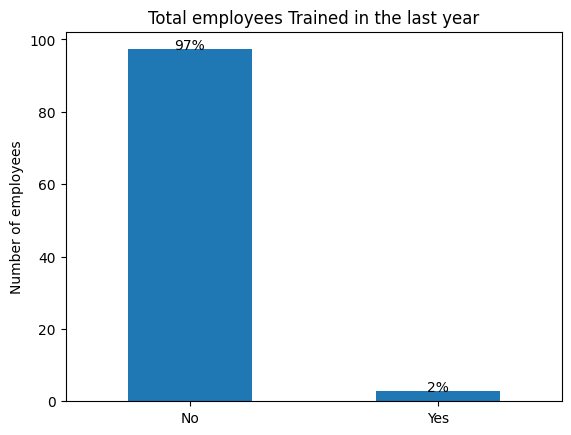

In [ ]:
# What is the percentage count of employees who have received training in recent year?
training= Employee['Training_Last_Year'].value_counts(normalize=True)*100
ax = training.plot.bar(title = 'Total employees Trained in the last year'
              ,xlabel ="", ylabel ='Number of employees')
ax.set_xticklabels(training.index,rotation = 0)
# map x-axis column values
plt.xticks(ticks=[0,1],labels= ['No','Yes'])
plt.grid(False)
# set data labels to pecentage
for y in ax.patches:
    ax.annotate(f'{int(y.get_height())}%',(y.get_x() + y.get_width()
                                           / 2,y.get_height()),ha='center',va='baseline')
plt.show()

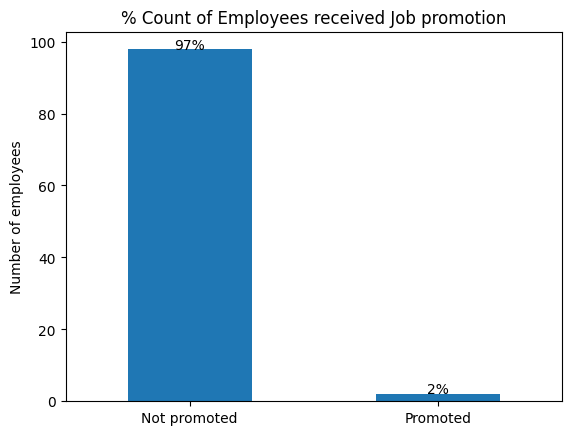

In [ ]:
# What is the percentage count of employees who have received job promotion in last 5 years?
promotion=Employee['promotion_last_5years'].value_counts(normalize=True)*100
ax = promotion.plot.bar(title = '% Count of Employees received Job promotion'
              ,xlabel ="", ylabel ='Number of employees')
ax.set_xticklabels(promotion.index,rotation = 0)
# map x-axis column values
plt.xticks(ticks=[0,1],labels= ['Not promoted','Promoted'])
plt.grid(False)
# set data labels to pecentage
for y in ax.patches:
    ax.annotate(f'{int(y.get_height())}%',(y.get_x() + y.get_width()
                                           / 2,y.get_height()),ha='center',va='baseline')
plt.show()



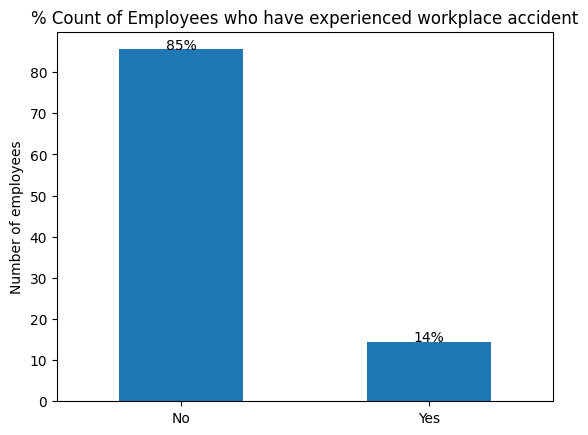

In [ ]:
# What is the percentage count of employees who have received job promotion in last 5 years?
acc=Employee['Work_accident'].value_counts(normalize=True)*100
ax = acc.plot.bar(title = '% Count of Employees who have experienced workplace accident'
              ,xlabel ="", ylabel ='Number of employees')
ax.set_xticklabels(acc.index,rotation = 0)
# map x-axis column values
plt.xticks(ticks=[0,1],labels= ['No','Yes'])
plt.grid(False)
# set data labels to pecentage
for y in ax.patches:
    ax.annotate(f'{int(y.get_height())}%',(y.get_x() + y.get_width()
                                           / 2,y.get_height()),ha='center',va='baseline')
plt.show()



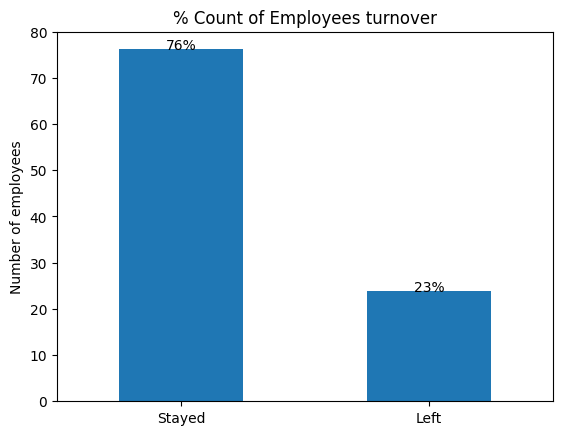

In [ ]:
# What is the percentage count of employees retention and turnover?
turnover=Employee['left'].value_counts(normalize=True)*100
ax = turnover.plot.bar(title = '% Count of Employees turnover'
              ,xlabel ="", ylabel ='Number of employees')
ax.set_xticklabels(acc.index,rotation = 0)
# map x-axis column values
plt.xticks(ticks=[0,1],labels= ['Stayed','Left'])
plt.grid(False)
# set data labels to pecentage
for y in ax.patches:
    ax.annotate(f'{int(y.get_height())}%',(y.get_x() + y.get_width()
                                           / 2,y.get_height()),ha='center',va='baseline')
plt.show()

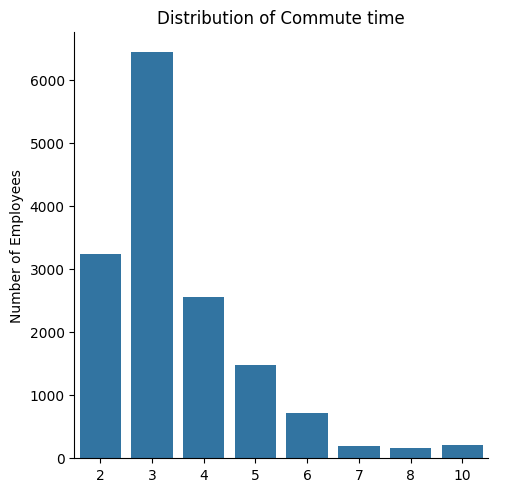

In [ ]:
# how many hours does it take employees to commute to and fro work?
sns.catplot(data=Employee, x='Commute_time', kind ='count')
plt.title('Distribution of Commute time')
plt.xlabel("")
plt.ylabel('Number of Employees')
plt.show()

##### The average time employees spend commuting to work is 3, while a distinct numbers of employees spend between 5 to 10 hours commuting to work
#

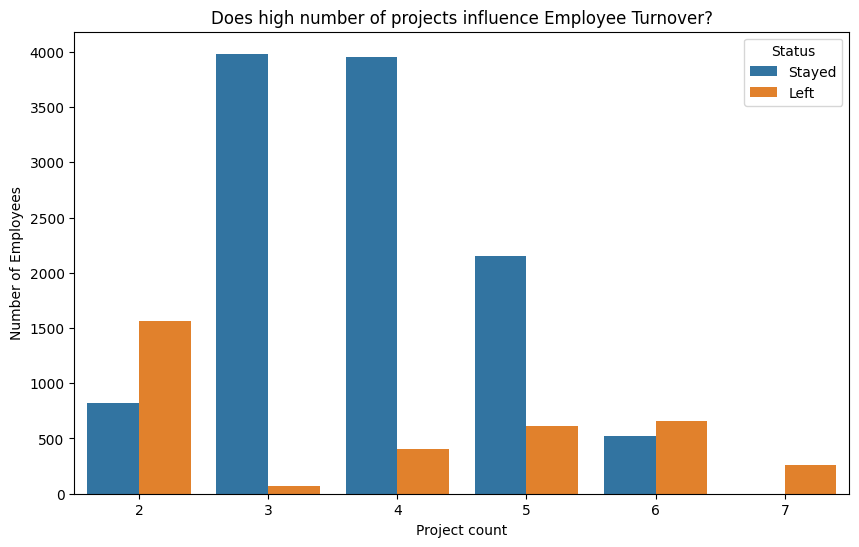

In [ ]:
# How does high number of projects influence employee turnover?
plt.figure(figsize=(10,6))
sns.countplot(data=Employee, x = 'number_project',hue='left')
plt.title('Does high number of projects influence Employee Turnover?')
plt.xlabel('Project count')
plt.ylabel('Number of Employees')
plt.grid(False)
plt.legend(title='Status',labels=['Stayed','Left'], loc='upper right')
plt.show()

##### The result indicates that employees who work on 6 to 7 projects per time have a higher chance of quiting their jobs. However, employees who also work a minimum of 2 projects per time also have higher chance of living the company. This could be due to lack of career progression, underutilization, leadership style, and company culture.
#

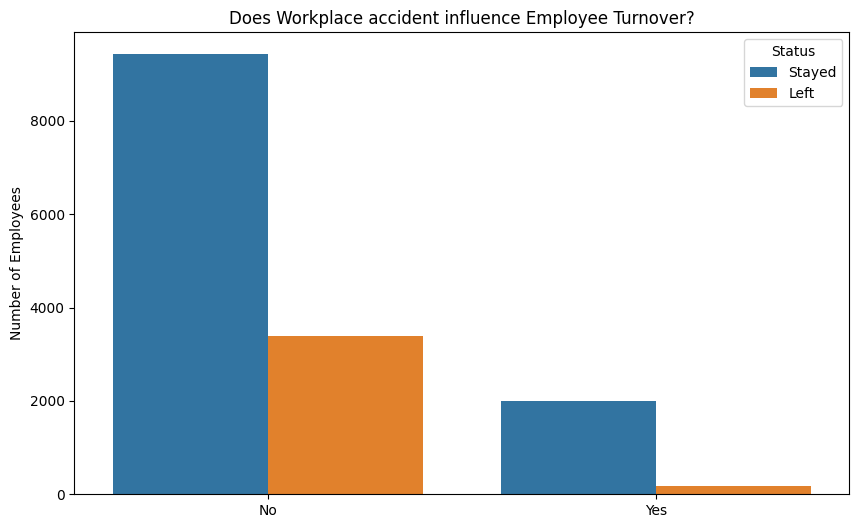

In [ ]:
# How does workplace accident influence employee turnover?
plt.figure(figsize=(10,6))
sns.countplot(data=Employee, x = 'Work_accident',hue='left')
plt.title('Does Workplace accident influence Employee Turnover?')
plt.xlabel("")
plt.ylabel('Number of Employees')
# map x-axis column values
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.grid(False)
plt.legend(title='Status',labels=['Stayed','Left'], loc='upper right')
plt.show()

##### There are lesser count of employees who have being involved in work accident. Most employees who experience work accident tends to continue working at the company compared to employees who exeperience work accident. THis indicates that they are other factors influencing employees to leave the company.
#

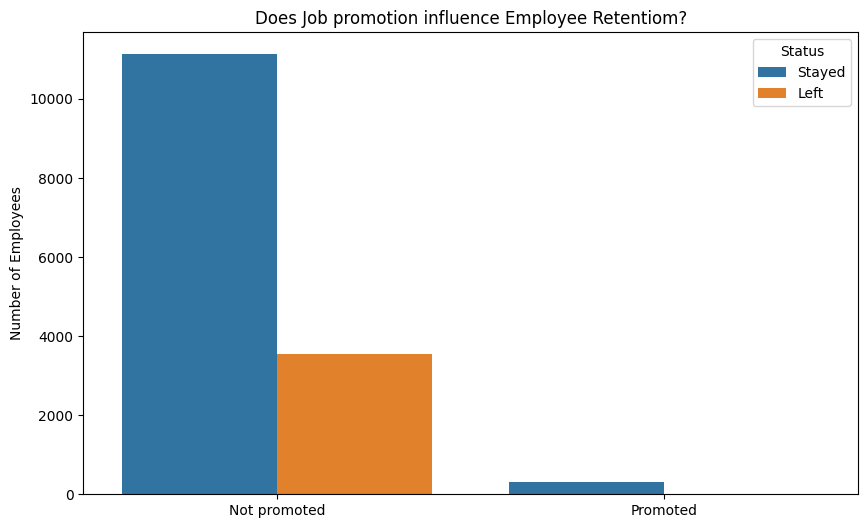

In [ ]:
# How does job promotion influence employee retention?
plt.figure(figsize=(10,6))
sns.countplot(data=Employee, x ='promotion_last_5years',hue='left')
plt.title('Does Job promotion influence Employee Retentiom?')
plt.xlabel("")
plt.ylabel('Number of Employees')
# map x-axis column values
plt.xticks(ticks=[0,1],labels=['Not promoted','Promoted'])
plt.grid(False)
plt.legend(title='Status',labels=['Stayed','Left'], loc='upper right')
plt.show()

##### Employees who have been promoted in the last 5 years tend to continue working at the company, while some employees who have not received job promtion have left.
#

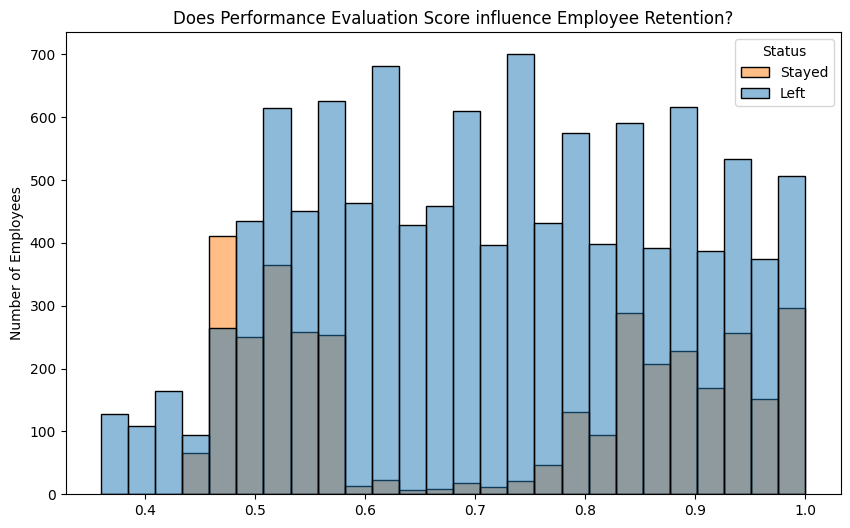

In [ ]:
# How does Performance evaluation affect employee Retention?
plt.figure(figsize=(10,6))
sns.histplot(data=Employee, x = 'last_evaluation',hue='left',color='darkblue')
plt.title('Does Performance Evaluation Score influence Employee Retention?')
plt.xlabel("")
plt.ylabel('Number of Employees')
plt.grid(False)
plt.legend(title='Status',labels=['Stayed','Left'])
plt.show()

- The 50th percentile is 0.7, this implies that 50% of employees performance evaluation score is below 0.7. Most employees who score between 0.4 to 0.5 have a significantly higher chance of leaving the company. The analysis also suggests that employees who score between 0.8 to 1.0 have a higher chance of leaving the company.
- As performance evaluation scores increase, the number of employees who stay appears higher than those who leave. However, there’s a noticeable number of employees with high performance scores who have still left the company.This could be as a result of factors such as job dissatisfaction, work-life balance, leadership style.
  #

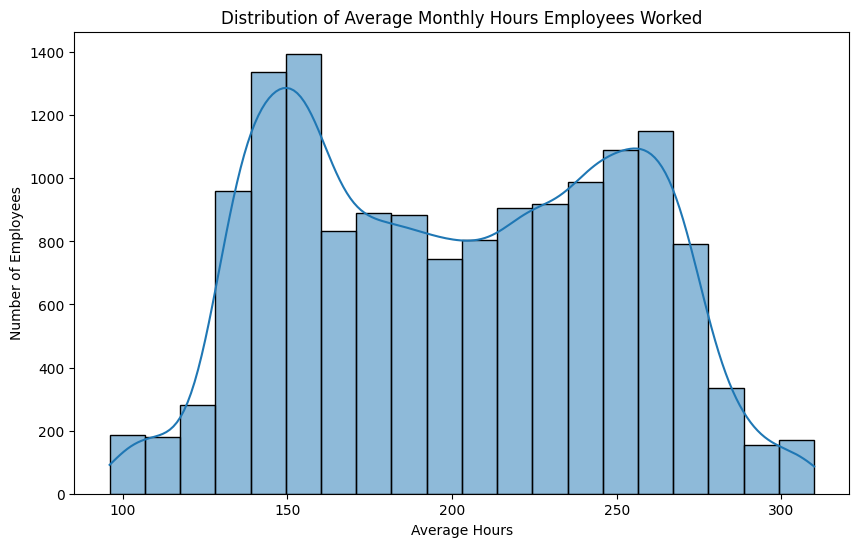

In [ ]:
# Whats the average monthy hours employees work per month?
plt.figure(figsize=(10,6))
sns.histplot(data = Employee, x = 'average_monthly_hours', bins=20, kde=True)
plt.title('Distribution of Average Monthly Hours Employees Worked')
plt.xlabel('Average Hours')
plt.ylabel('Number of Employees')
plt.show()

##### A distinct number of employees work an average monthly hours of 150 to 200, and others work between 250 to 300 hours. This indicates there are two distinct group of employees by working hours

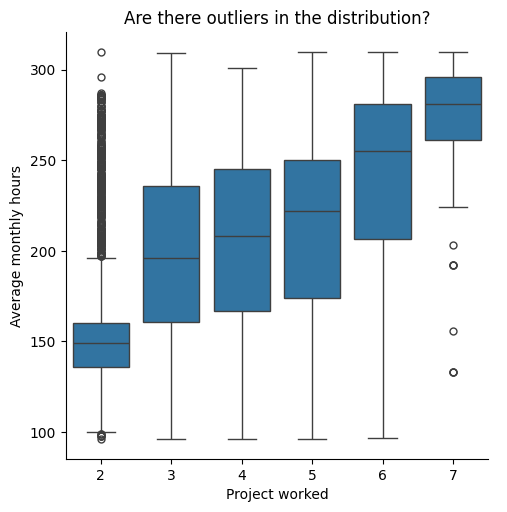

In [ ]:
# Checking if there are any clusters and outiers in number of project worked and average hours
sns.catplot(data=Employee, x='number_project', y='average_monthly_hours', kind='box')
plt.title( 'Are there outliers in the distribution?')
plt.xlabel('Project worked')
plt.ylabel('Average monthly hours')
plt.show()

##### The Points outside in the chart are considered outliers which is abnormal. There are several outliers in the distribution which is present in employees working 2 and 7 projects. However, the trend indicates that average monthly hours increases with number of projects.
#

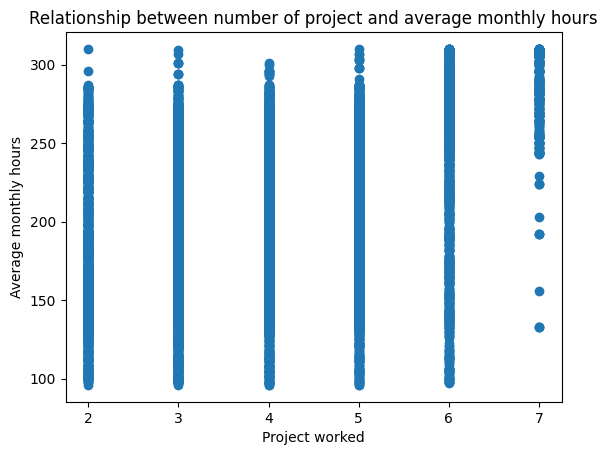

In [ ]:
# Is there a relationship between the number of projects and average monthly hours?
plt.scatter(Employee['number_project'], Employee['average_monthly_hours'])
plt.title('Relationship between number of project and average monthly hours')
plt.xlabel('Project worked')
plt.ylabel('Average monthly hours')
plt.show()

##### The scatter plot above indicates a moderately positive correlation between number of projects worked and average monthly hours. As number of projects increases, the average monthly hours also tend to increase. Hence, there is a significant variability in the distribution .This proves that while more projects lead to more hours the exact number of hours varies. For instance, most employees who work 6 to 7 projects work an average of more than 200 hours a month, while some employees work fewer hours. This implies differences in how complex a project may be and individual productivity.


Is there any correlation betweeen these variables?


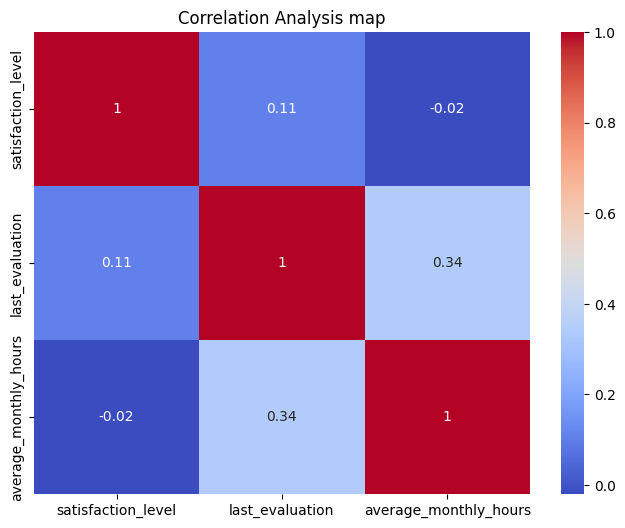

In [ ]:
# Using a heatmap, calculate the correlation between satisfaction level, performance evaluation and average monthly hours works?
print('Is there any correlation betweeen these variables?')
# create a list to plot relationship between variables
matrix = Employee[columns].corr()
columns = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis map')
plt.show()

- There is a moderate positive correlation between last evaluation and average monthly hours.
- There is a weak postive correlation between satisfaction level and last evaluation.
- There is a weak neagtive correlation between satisfaction level and average monthly hours
##### *These analysis indicates that employees working more hours tend to have higher performance evaluation score but have very low satisfaction level.*

# Conclusion
1. Although most employees are moderately satisfied with their job, both dissatisfied and
satisfied employees are leaving the company at a significantly high rate. This indicates
that the workplace may be toxic, and strategies need to be developed in order to solve
this issue.
2. A high number of employees are paid a low salary range. Hence, high salary level
influences employee retention and low salary level influence employee turnover.
3. Work accident do not have a direct impact in employee turnover. About 85% of
employees did not experience work accident, and most employees who experienced
work accident did not leave.
4. The duration employees commute to and from work influences employee turnover.
Employees spend high number of hours commuting to work, with a minimum of 2
hours.
5. Both employees who have high and low performance evaluation score are leaving
company. However, the increase in performance evaluation score influences employee
retention.
6. Job promotion and training influences employee turnover. More than 70% of employees
are not offered promotion and training development in recent years.
7. Employees who have higher amount of workload are most likely to leave the company
due to burnout and stress. However, employees who are involved in little workload are
also leaving the company due to underutilization of their skills. work-life balance will
help increase employee retention. 70% of employees work more than 200 hours per
month, this also contributes to employee turnover as they are often overworked, and
underpaid.
8. There is little to no opportunity for career progression since very few employees are
offered training and promotion.
Recommendation
1. Employee Recognition: The company needs to recognize and reward employees for
their hard work. Regularly or periodically acknowledging employees for their
contributions and hard work will foster engagement and motivation which may help
increase employee retention.
2. Professional Development: Fostering career growth by offering opportunities for career
development such as investing in training and career progression will help promote
employee retention.
3. Employee Workload: Different departments and job roles have varying workloads.
Management should discuss with employees the proper number of hours employees
should spend per task and no employee should work more than 3 projects per time. This
will help improve engagement and balance individual workload without causing stress.
4. Employee Satisfaction Issues: Implement assessment such as survey, creating a
platform where employees can voice their concerns will help identify the reasons for the
high dissatisfaction rate across various departments in the company.
5. Improve Salary Structure: Since most employees are paid low salary, measures should
be put in place to ensure that employees receive fair base salaries for their work. This
will help improve satisfaction and reduce turnover.
6. Retention Strategy: Specific department like sales, technical and support teams require
targeted strategies to help improve satisfaction, maintain a stable and productive
workforce, and reduce the high rate of employee turnover in these departments
7. Work-life Balance Policies: Policies on proper work-life balance such as flexible leave
policies, regular team building exercises, encouraging hobbies will help improve
satisfaction and maintain productivity in the workplace.


# Recommendation
1. **Employee Recognition:** The company needs to recognize and reward employees for
their hard work. Regularly or periodically acknowledging employees for their
contributions and hard work will foster engagement and motivation which may help
increase employee retention.
2. **Professional Development:** Fostering career growth by offering opportunities for career
development such as investing in training and career progression will help promote
employee retention.
3. **Employee Workload:** Different departments and job roles have varying workloads.
Management should discuss with employees the proper number of hours employees
should spend per task and no employee should work more than 3 projects per time. This
will help improve engagement and balance individual workload without causing stress.
4. **Employee Satisfaction Issues:** Implement assessment such as survey, creating a
platform where employees can voice their concerns will help identify the reasons for the
high dissatisfaction rate across various departments in the company.
5. **Improve Salary Structure:** Since most employees are paid low salary, measures should
be put in place to ensure that employees receive fair base salaries for their work. This
will help improve satisfaction and reduce turnover.
6. **Retention Strategy:** Specific department like sales, technical and support teams require
targeted strategies to help improve satisfaction, maintain a stable and productive
workforce, and reduce the high rate of employee turnover in these departments.
7. **Work-life Balance Policies:** Policies on proper work-life balance such as flexible leave
policies, regular team building exercises, encouraging hobbies will help improve
satisfaction and maintain productivity in the workplace.
